<a href="https://colab.research.google.com/github/Kapongz/Bootstrap-test/blob/main/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ເປັນການ import ແພັກແກັດຕ່າງໆມານຳໃຊ້

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'




> pandas ໃຊ້ໃນການຈັດການຂໍ້ມູນຂະໜາດນ້ອຍຈົນໄປຮອດຂໍ້ມູນຂະໜາດໃຫຍ່

> seaborn ເປັນ libary ຂອງ matplotlib ທີ່ໃຊ້ໄວ້ແຈກແຈງໃຫ້ເຮົາເຫັນພາບຂໍ້ມູນທີ່ເປັນແບບ ສຸ່ມ



> numpy ແມ່ນ Libary ທີ່ໃຊ້ໃນການຄຳນວນທາງຄະນິດສາດຂອງພາສາ Python ໂດຍ numpy ສາມາດຈັດການ ອາເຣ (array) ຫຼາຍມິຕິໄດ້

> matplotlib ແມ່ນ Module ພື້ນຖາມໃນການສ້າງກຣາຟ ໃນພາສາ python

> %matplotlib inline ແມ່ນ Magic command ທີ່ເຮັດໃຫ້ແຜນພາບທີ່ສ້າງໂດຍ matplotlib ສະແດງໃນເຊວ IPython

> %config InlineBackend.figure_format = 'svg' ໃຊ້ເພື່ອສະແດງຮູບພາບແບບ svg











In [2]:
print(f"pandas  version: {pd.__version__}")
print(f"numpy   version: {np.__version__}")
print(f"seaborn version: {sns.__version__}")


pandas  version: 1.3.5
numpy   version: 1.21.6
seaborn version: 0.11.2




> ສະແດງ version ຂອງ *pandas* , *numpy* , *seaborn*



In [3]:
url = "https://github.com/prasertcbs/basic-dataset/raw/master/baskin_robbins_classifier.csv"
df = pd.read_csv(url)
df.head()


,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category
0,Bananas Foster,160,8.0,0.2,20,16,2.0,std
1,Baseball Nut,160,9.0,0.2,19,13,3.0,std
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,std
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,std
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,light




> df ເປັນໂຕແປ ໄວ້ເກັບຂໍ້ມູນຈາກການໃຊ້ pd ອ່ານຟາຍຂໍ້ມູນ CSV

> ແລ້ວສະແດງຂໍ້ມູນ 5 ແຖວທຳອິດ





In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   Category           70 non-null     object 
dtypes: float64(3), int64(3), object(2)
memory usage: 4.5+ KB




> ສະແດງຂໍ້ມູນລາຍລະອຽດທັງໝົດໃນ DataFrame ແບບຫຍໍ້



In [5]:

df.columns


Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'Category'],
      dtype='object')



> ສະແດງຖັນທັງໝົດໃນ df



In [6]:
cols = [
    "Calories",
    "Total Fat (g)",
    "Trans Fat (g)",
    "Carbohydrates (g)",
    "Sugars (g)",
    "Protein (g)",
]




> ສ້າງໂຕແປເກັບຖັນທີ່ຈະນຳໄປໃຊ້



# ເປັນການສະແດງຂໍ້ມູນ ໃນຮູບແບບ violinplot

> ໂດຍໃຫ້ X ເປັນ Category ແລະ y  ເປັ col ໂຕແປຖັນທີ່ສ້າງໄວ້

> ໃຊ້ເທັກນິກຂອງ ax ກຳນົດ nrows=2 ແຖວ : ncols=3 ຖັນ ແລະໃຊ້ plt.subplots ກຳນົດຂະໜາດ ຂະໜາດຄວາມກ້ວາງ 20 ສູງ 9





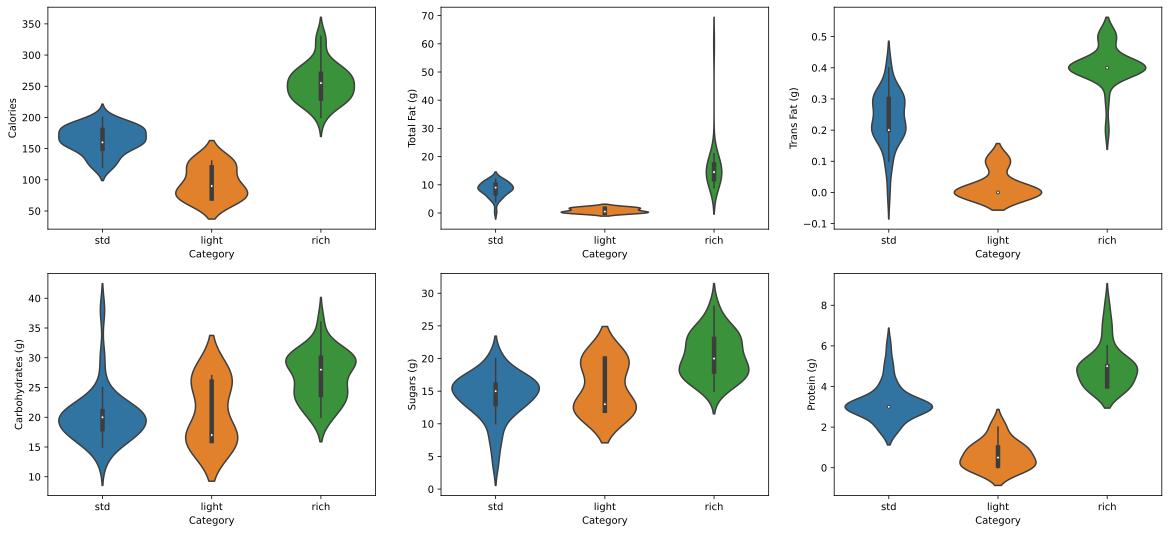

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax = ax.ravel() #ໃຫ້ແນມເຫັນເປັນ ອາເລ 1 ມິຕິ
for i, col in enumerate(cols):
    sns.violinplot(x="Category", y=col, data=df, ax=ax[i])


# Draw Decision Tree



> import train_test_split ໃຊ້ເພື່ອແຍກຂໍ້ມູນອອກເປັນຊຸດຝຶກ ແລະ ຊຸດທົດສອບ

> import DecisionTreeClassifier ໄວ້ເພື່ອຈຳແນກ class ຕ່າງໆໃນຊຸດຂໍ້ມູນ





In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    plot_confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    precision_recall_fscore_support,
    f1_score,
)




> ສະແດງ column



In [9]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'Category'],
      dtype='object')



> ສ້າງໂຕແປເກັບ column ທີ່ຈະນຳໄປໃຊ້



In [10]:
cols = [
    "Calories",
    "Total Fat (g)",
    "Trans Fat (g)",
    "Carbohydrates (g)",
    "Sugars (g)",
    "Protein (g)",
]




> ແລ້ວເອົາ column ມາສ້າງເປັນ X ແລະ y



In [13]:
X = df[cols]  # features
y = df["Category"]  # label




> ໂຕນີ້ຈະເປັນການ split ຫຼື ເອີ້ນວ່າການແບ່ງຊຸດຂໍ້ມູນ ໂດຍໃຫ້ test_size = 0.2 ຫຼັງຈາກ split ແລ້ວເຮົາຈະໄດ້ X_train, X_test, y_train, y_test

ກຳນົດ random_state ເພື່ອໃຫ້ມັນ Reproduce ຫຼື ວ່າເຮັດວຽກຊ້ຳ ຂອງຜົນລັບໄດ້



In [12]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=7
)




> ສ້າງ Object model ທີ່ເກີດຈາກ DecisionTreeClassifier

> ຫຼັງຈາກນັ້ນເອົາ model ມາ fit x_train,y_train





In [14]:
model = DecisionTreeClassifier(criterion="gini")  # gini is a default
# model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)


DecisionTreeClassifier()



> ສະແດງ columns ຂອງ X_train



In [15]:
X_train.columns

Index(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)',
       'Sugars (g)', 'Protein (g)'],
      dtype='object')




> ສະແດງ model.feature_importances_

> feature_importances_ ໝາຍເຖິງເຕັກນິກການຄຳນວນຄະແນນສຳລັບ input features ທັງໝົດສຳລັບໂມເດວທີ່ກຳນົດ ຈະເບຶ່ງຄວບຄູ່ກັບ columns





In [16]:
model.feature_importances_

array([0.62367944, 0.31901352, 0.        , 0.        , 0.05730704,
       0.        ])



> ສະແດງ feature_importances_ ແບບລະອຽດໂດຍໃຊ້ pd.Series ແລະ ສາມາດ sort_values ສະແດງຂໍ້ມູນນ້ອຍຫາຫຼາຍໄດ້ພຽງແຕ່ປ່ຽນຈາກ false or true



In [17]:
fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
fs


Calories             0.623679
Total Fat (g)        0.319014
Sugars (g)           0.057307
Trans Fat (g)        0.000000
Carbohydrates (g)    0.000000
Protein (g)          0.000000
dtype: float64



> ເປັນການດຶງຂໍ້ມູນທີ່ຢູ່ y_train ມານັບວ່າແຕ່ລະໂຕມີເທົ່າໃດ



In [18]:
y_train.value_counts()

std      26
rich     23
light     7
Name: Category, dtype: int64



> ສ້າງໂຕແປ clf ເກັບຄ່າຂໍ້ມູນທີ່ເກີດຈາກ DecisionTreeClassifier

> ຫຼັງຈາກນັ້ນທຳການ fit(X_train, y_train)



> fit() ຄືການເຮັດໃຫ້ຂໍ້ມູນພໍດີກ່ອນຈະນຳໄປໃຊ້

> clf.__dict__ ເປັນການສະແດງ attributes ຕ່າງໆຂອງ object ມາສະແດງ







In [20]:
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(X_train, y_train)
clf.__dict__


{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)',
        'Sugars (g)', 'Protein (g)'], dtype=object),
 'n_features_in_': 6,
 'n_outputs_': 1,
 'classes_': array(['light', 'rich', 'std'], dtype=object),
 'n_classes_': 3,
 'max_features_': 6,
 'tree_': <sklearn.tree._tree.Tree at 0x7f45c3806ea0>}



> ສະແດງ attribute ຂອງ tree_



In [21]:
clf.__dict__["tree_"]



> ເປັນການຮັບປະເພດຂອງ object



In [22]:
type(clf)

sklearn.tree._classes.DecisionTreeClassifier



> ສະແດງ attribute ຂອງ classes_



In [23]:
clf.__dict__["classes_"]

array(['light', 'rich', 'std'], dtype=object)

# ເປັນການ Export  decision tree ໃນຮູບແບບ DOT ແລ້ວໃຫ້ມັນສົ່ງມາເປັນຟາຍ PNG

In [34]:
from sklearn.tree import export_graphviz
from graphviz import Digraph, Source

def view_tree(model, X, save_tree_img=False):
    estimators = clf
    dot_graph = export_graphviz(
        estimators,
        feature_names=X.columns,
        class_names=model.__dict__["classes_"],
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    #     with open(f'tree{tree_index}.dot') as f:
    #         dot_graph = f.read()
    g = Source(dot_graph)
    if save_tree_img:
        g.render(f"tree", format="png", view=False, cleanup=True)
    return g




> ສະແດງຮູບພາບແບບ tree



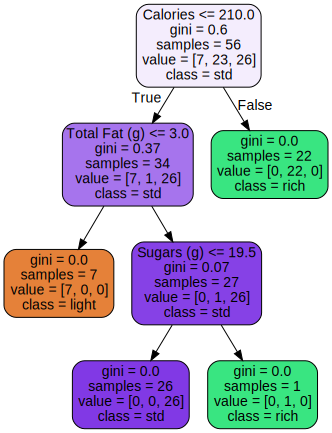

In [25]:
view_tree(clf, X_test, save_tree_img=False)



> ສ້າງໂຕແປ cm ເກັບຄ່າຈາກການໃຊ້ confusion_matrix ຫາຄ່າ positive ແລະ negative  ຈາກ y_test,ແລະ predict(x_test)



In [26]:
cm = confusion_matrix(y_test, model.predict(X_test))
cm


array([[2, 0, 0],
       [0, 5, 0],
       [1, 1, 5]])



> ເປັນການປະເມີນປະສິດທິພາບຂອງໂມເດວໂດຍສະແດງ precision  ,   recall   ,f1-score ,  support



In [35]:
print(classification_report(y, model.predict(X)))



              precision    recall  f1-score   support

       light       0.90      1.00      0.95         9
        rich       0.97      1.00      0.98        28
         std       1.00      0.94      0.97        33

    accuracy                           0.97        70
   macro avg       0.96      0.98      0.97        70
weighted avg       0.97      0.97      0.97        70





> ສະແດງຂໍ້ມູນພາຍໃນ tree ຫຼືຮູບພາບຂ້າງເທິງ



In [36]:
model.tree_.impurity  # gini
model.tree_.value


array([[[ 7., 23., 26.]],

       [[ 7.,  1., 26.]],

       [[ 7.,  0.,  0.]],

       [[ 0.,  1., 26.]],

       [[ 0.,  0., 26.]],

       [[ 0.,  1.,  0.]],

       [[ 0., 22.,  0.]]])

# import Axes3D ເພື່ອສະແດງພາບ 3 ມິຕິ

In [37]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D




> ສະແດງແບບ inline mode ແບບທຳມະດາ



In [30]:
# switch to interactive matplotlib
# %matplotlib qt
# %pylab qt

# switch back to inline mode
%matplotlib inline




> ເປັນການກຳນົດຂະໜາດ ແລະ ສີຕ່າງໆໃຫ້ກັບພາບ



Text(0.5, 0, 'Sugars (g)')

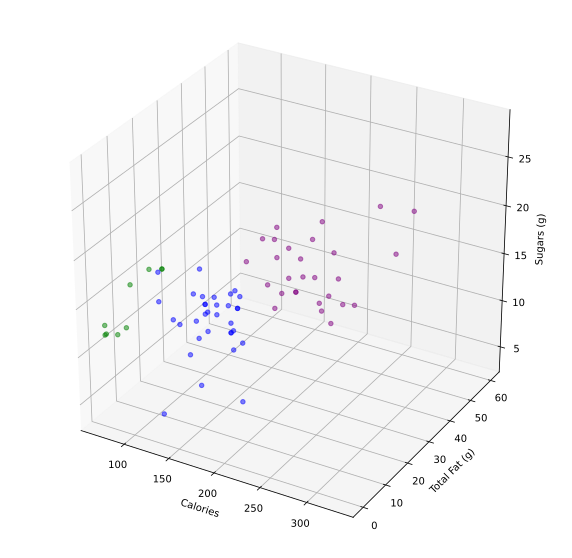

In [31]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
colors = y.map({"light": "green", "std": "blue", "rich": "purple"})
ax.scatter(X["Calories"], X["Total Fat (g)"], X["Sugars (g)"], alpha=0.5, c=colors)
ax.set_xlabel("Calories")
ax.set_ylabel("Total Fat (g)")
ax.set_zlabel("Sugars (g)")




> ເປັນການ predict ໂມເດວ x_test



In [32]:
predicted = model.predict(X_test)
predicted


array(['light', 'rich', 'std', 'rich', 'rich', 'std', 'std', 'rich',
       'rich', 'light', 'std', 'std', 'light', 'rich'], dtype=object)



> crosstab ເບິ່ງຄວາມແມ່ນຍຳ



In [33]:
pd.crosstab(y_test, predicted)

col_0,light,rich,std
Category,,,
light,2,0,0
rich,0,5,0
std,1,1,5


# ສະຫຼຸບ Decision Tree Classification ເປັນການຈຳແນກປະເພດຂໍ້ມູນ ເປັນການວິເຄາະຫາຄວາມສຳພັນຂອງຂໍ້ມູນ ເພື່ອນຳຂໍ້ມູນໄປຄາດເດົາ